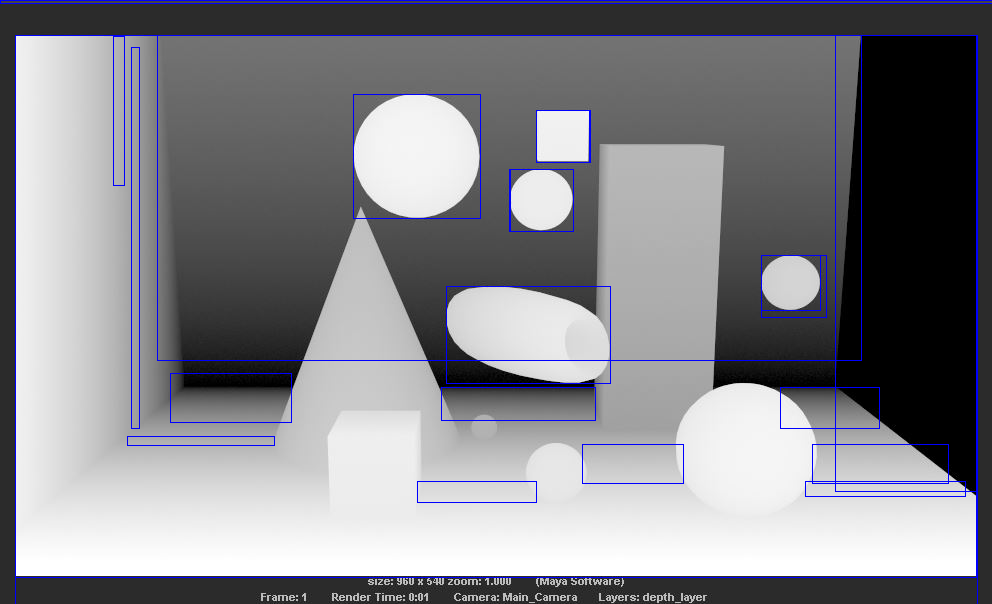

In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import the Colab patch for cv2.imshow()

# Load depth image
depth_img = cv2.imread("/content/depthMap.jpeg", cv2.IMREAD_GRAYSCALE)
if depth_img is None:
    print("Error loading image")
    exit()

# cv2_imshow(depth_img)

# Preprocess image (e.g., blur and threshold)
blurred = cv2.GaussianBlur(depth_img, (5, 5), 1)
ret, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(blurred, 4, 12)  # Adjusted Canny edge thresholds

# cv2_imshow(edges)

# Apply morphological operations to close gaps in edges
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# cv2_imshow(closed_edges)

# Find contours
contours, hierarchy = cv2.findContours(closed_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create output image
output = cv2.cvtColor(depth_img, cv2.COLOR_GRAY2BGR)

# Iterate through contours and draw bounding boxes for significant contours
min_contour_area = 1000  # Minimum area threshold to filter out small contours
for contour in contours:
    if cv2.contourArea(contour) > min_contour_area:
        # Get the bounding box
        x, y, w, h = cv2.boundingRect(contour)
        # Draw the bounding box
        cv2.rectangle(output, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Display the output image
cv2_imshow(output)
cv2.waitKey(0)
cv2.destroyAllWindows()
